In [48]:
pip install ucimlrepo numpy pandas matplotlib scikit-learn seaborn autograd torch tabulate xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 51.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 36.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]
Note: you may need to restart the kernel to use updated packages.


In [49]:
try:
    from ucimlrepo import fetch_ucirepo

    # fetch dataset
    support2 = fetch_ucirepo(id=880)

    # data (as pandas dataframes)
    X = support2.data.features
    y = support2.data.targets

    # metadata
    print(support2.metadata)

    # variable information
    print(support2.variables)
except ConnectionError as e:
    import pandas as pd
    print("Unable to fetch dataset. Trying to load from local file.")
    support2 = pd.read_csv("data.csv")
    X = support2.iloc[:,:-3]
    y = support2.iloc[:,-3:]

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [ ]:
# support2.variables.to_csv("support2_codebook.csv", index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.concat([X,y],axis=1)
data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.250,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.000,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.500,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.500,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.900,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000,0,0,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,32042.7500,20.333328,white,16.296875,22.0,0.852905,0.801880,13,0,0,no,0.80,0.512,no dnr,23.0,109.0,7.399414,104.0,22.0,35.69531,280.00000,3.699707,0.399963,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000,0,0,NaN
9101,55.15399,female,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,22131.0469,18.000000,white,25.796875,31.0,0.553955,0.485962,1,0,0,no,0.50,0.500,no dnr,29.0,43.0,NaN,0.0,8.0,38.59375,218.50000,NaN,NaN,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000,0,0,NaN
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,31131.2500,23.000000,white,22.699219,39.0,0.741943,0.660889,18,0,0,no,0.90,0.800,no dnr,8.0,111.0,8.398438,83.0,24.0,36.69531,180.00000,NaN,0.399963,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391,0,0,NaN
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,NaN,35.500000,white,40.195312,51.0,0.177979,0.091995,22,0,0,yes,0.09,0.090,dnr after sadm,5.0,99.0,7.599609,110.0,24.0,36.39844,428.56250,1.199951,0.399963,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000,1,1,<2 mo. follow-up


In [ ]:
missed_target_data = data[data['sfdm2'].isnull()]
data = data.dropna(subset=['sfdm2'])

In [ ]:
from tabulate import tabulate
def dataUnderstanding(data):
  # Number of the rows and columns
  rows, columns = data.shape
  print('-' * 50)
  print(f"Number of Rows:{rows} | Number of Columns:{columns}")
  print('-' * 50)
  print()

  # List of columns
  columns_df = pd.DataFrame(data.columns, columns=["Column Names"])
  print("List of Features in the dataset:")
  print(tabulate(columns_df, headers='keys', tablefmt='psql', showindex=False))
  print('-' * 50)
  print()

  # Print Data type
  print("Summarized basic information:\n")
  data.info()
  print('-' * 50)
  print()

  # printing all the numerical datatype columns
  numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
  print(f"Printing all the numerical columns --> {numerical_columns}")
  print()
  # printing all the object datatype columns
  object_columns = data.select_dtypes(include=['object']).columns.tolist()
  print(f"Printing all the Object columns --> {object_columns}")
  print('-' * 50)
  print()

  # finding the missing values
  print(f"Finding the number of missing values in all the columns -->\n")
  print(data.isna().sum())
  print('-' * 50)


dataUnderstanding(data)

--------------------------------------------------
Number of Rows:7705 | Number of Columns:45
--------------------------------------------------

List of Features in the dataset:
+----------------+
| Column Names   |
|----------------|
| age            |
| sex            |
| dzgroup        |
| dzclass        |
| num.co         |
| edu            |
| income         |
| scoma          |
| charges        |
| totcst         |
| totmcst        |
| avtisst        |
| race           |
| sps            |
| aps            |
| surv2m         |
| surv6m         |
| hday           |
| diabetes       |
| dementia       |
| ca             |
| prg2m          |
| prg6m          |
| dnr            |
| dnrday         |
| meanbp         |
| wblc           |
| hrt            |
| resp           |
| temp           |
| pafi           |
| alb            |
| bili           |
| crea           |
| sod            |
| ph             |
| glucose        |
| bun            |
| urine          |
| adlp           |
| ad

# Data Preprocessing

## Data Cleaning

### Missing Values

In [ ]:
missing_value_table = data.isnull().sum()
missing_value_proportion = missing_value_table[missing_value_table>0].sort_values(ascending=False) / len(data)
for i in missing_value_proportion.index:
    print("{}: {:.2f}%".format(i,missing_value_proportion[i]*100), f'dtype={data[i].dtype}')

adlp: 60.78% dtype=float64
urine: 53.04% dtype=float64
glucose: 48.63% dtype=float64
bun: 47.33% dtype=float64
totmcst: 37.61% dtype=float64
alb: 36.07% dtype=float64
income: 28.70% dtype=object
bili: 27.90% dtype=float64
adls: 26.26% dtype=float64
pafi: 24.50% dtype=float64
ph: 24.04% dtype=float64
prg2m: 17.26% dtype=float64
prg6m: 17.09% dtype=float64
edu: 13.56% dtype=float64
totcst: 9.90% dtype=float64
wblc: 2.22% dtype=float64
charges: 1.83% dtype=float64
avtisst: 0.87% dtype=float64
crea: 0.65% dtype=float64
dnrday: 0.39% dtype=float64
dnr: 0.39% dtype=object
race: 0.38% dtype=object
scoma: 0.01% dtype=float64
surv6m: 0.01% dtype=float64
sps: 0.01% dtype=float64
aps: 0.01% dtype=float64
surv2m: 0.01% dtype=float64
resp: 0.01% dtype=float64
temp: 0.01% dtype=float64
meanbp: 0.01% dtype=float64
hrt: 0.01% dtype=float64
sod: 0.01% dtype=float64


In [ ]:
X_pd = pd.DataFrame(X)
y_pd = pd.DataFrame(y)
X_pd.isnull().sum(), y_pd.isnull().sum()

(age            0
 sex            0
 dzgroup        0
 dzclass        0
 num.co         0
 edu         1634
 income      2982
 scoma          1
 charges      172
 totcst       888
 totmcst     3475
 avtisst       82
 race          42
 sps            1
 aps            1
 surv2m         1
 surv6m         1
 hday           0
 diabetes       0
 dementia       0
 ca             0
 prg2m       1649
 prg6m       1633
 dnr           30
 dnrday        30
 meanbp         1
 wblc         212
 hrt            1
 resp           1
 temp           1
 pafi        2325
 alb         3372
 bili        2601
 crea          67
 sod            1
 ph          2284
 glucose     4500
 bun         4352
 urine       4862
 adlp        5641
 adls        2867
 adlsc          0
 dtype: int64,
 death          0
 hospdead       0
 sfdm2       1400
 dtype: int64)

In [ ]:
for i in data.columns:
  print(f'{i}:{data[i].dtype}')

age:float64
sex:object
dzgroup:object
dzclass:object
num.co:int64
edu:float64
income:object
scoma:float64
charges:float64
totcst:float64
totmcst:float64
avtisst:float64
race:object
sps:float64
aps:float64
surv2m:float64
surv6m:float64
hday:int64
diabetes:int64
dementia:int64
ca:object
prg2m:float64
prg6m:float64
dnr:object
dnrday:float64
meanbp:float64
wblc:float64
hrt:float64
resp:float64
temp:float64
pafi:float64
alb:float64
bili:float64
crea:float64
sod:float64
ph:float64
glucose:float64
bun:float64
urine:float64
adlp:float64
adls:float64
adlsc:float64
death:int64
hospdead:int64
sfdm2:object


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

def fill_missing_values_simplified(data: pd.DataFrame) -> pd.DataFrame:
    """
    Fill missing values in a DataFrame using KNNImputer for numerical columns
    and SimpleImputer (most frequent) for categorical columns.

    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing missing values.

    Returns:
    --------
    pd.DataFrame
        The DataFrame with missing values filled.
    """
    data_filled = data.copy()
    
    # Identify numerical and categorical columns
    numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

    # Impute numerical columns with KNNImputer
    if numerical_cols and data_filled[numerical_cols].isnull().sum().sum() > 0:
        knn_imputer = KNNImputer(n_neighbors=13,weights='distance')
        data_filled[numerical_cols] = knn_imputer.fit_transform(data_filled[numerical_cols])

    # Impute categorical columns with the most frequent value
    if categorical_cols and data_filled[categorical_cols].isnull().sum().sum() > 0:
        simple_imputer = SimpleImputer(strategy='most_frequent')
        data_filled[categorical_cols] = simple_imputer.fit_transform(data_filled[categorical_cols])

    return data_filled

# Create a copy to avoid modifying the original data in place
data_filled = data.copy()

# Loop through columns with missing values and apply the simplified filling logic
for col in missing_value_proportion.index:
    # Add a missing value indicator column before filling
    data_filled['missing_' + col] = data_filled[col].isnull().astype(float)

# Apply the simplified imputation to the whole dataframe
data = fill_missing_values_simplified(data_filled)


In [ ]:
data.isnull().sum()

age               0
sex               0
dzgroup           0
dzclass           0
num.co            0
                 ..
missing_resp      0
missing_temp      0
missing_meanbp    0
missing_hrt       0
missing_sod       0
Length: 77, dtype: int64

In [ ]:
data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2,missing_adlp,missing_urine,missing_glucose,missing_bun,missing_totmcst,missing_alb,missing_income,missing_bili,missing_adls,missing_pafi,missing_ph,missing_prg2m,missing_prg6m,missing_edu,missing_totcst,missing_wblc,missing_charges,missing_avtisst,missing_crea,missing_dnrday,missing_dnr,missing_race,missing_scoma,missing_surv6m,missing_sps,missing_aps,missing_surv2m,missing_resp,missing_temp,missing_meanbp,missing_hrt,missing_sod
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,$11-$25k,44.0,34496.0,90204.727559,68874.764323,29.000000,white,52.695312,74.0,0.001000,0.000000,3.0,0.0,0.0,no,0.000000,0.000000,no dnr,32.379824,43.0,17.097656,112.0,34.0,34.59375,98.000000,2.962190,3.728209,5.500000,132.0,7.250000,148.366766,37.495239,2846.848771,1.174404,1.000000,1.000000,1.0,1.0,<2 mo. follow-up,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,41094.0,19285.552491,18200.711058,13.000000,white,20.500000,45.0,0.790894,0.664917,4.0,0.0,0.0,no,0.750000,0.500000,no dnr,17.000000,70.0,8.500000,88.0,28.0,37.39844,231.656250,3.041921,2.199707,2.000000,134.0,7.459961,131.743651,33.763453,2124.742578,1.000000,0.000000,0.000000,1.0,0.0,<2 mo. follow-up,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.38498,female,Lung Cancer,Cancer,2.0,11.000000,under $11k,0.0,3075.0,7220.971282,8678.051247,7.000000,white,20.097656,19.0,0.698975,0.411987,1.0,0.0,0.0,metastatic,0.900000,0.500000,no dnr,3.000000,75.0,9.099609,88.0,32.0,35.00000,289.138751,3.138684,1.075813,0.799927,139.0,7.403522,155.139540,37.794944,1845.020699,0.000000,0.000000,0.000000,1.0,0.0,no(M2 and SIP pres),0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,10.800732,under $11k,26.0,50127.0,27862.323252,26957.745205,18.666656,white,23.500000,30.0,0.634888,0.532959,3.0,0.0,0.0,no,0.900000,0.900000,no dnr,16.000000,59.0,13.500000,112.0,20.0,37.89844,173.312500,2.954350,2.499791,0.799927,143.0,7.509766,138.338089,40.883975,2283.567711,1.210487,2.000000,2.000000,0.0,0.0,no(M2 and SIP pres),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,93.01599,male,Coma,Coma,1.0,14.000000,under $11k,55.0,6884.0,12511.005442,14676.401247,5.000000,white,19.398438,27.0,0.284973,0.214996,1.0,0.0,0.0,no,0.000000,0.000000,no dnr,4.000000,110.0,10.398438,101.0,44.0,38.39844,266.625000,3.020217,2.850641,0.699951,140.0,7.659180,180.727767,31.166057,2904.168031,2.524308,1.000000,1.000000,1.0,1.0,<2 mo. follow-up,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9097,64.48499,female,Lung Cancer,Cancer,2.0,11.000000,$11-$25k,0.0,6830.0,4100.550800,3053.679690,17.006131,white,10.398438,14.0,0.817993,0.607910,1.0,1.0,0.0,metastatic,0.990000,0.990000,no dnr,3.000000,64.0,6.199219,116.0,8.0,39.39844,175.000000,3.000000,1.499646,1.699951,129.0,7.359375,278.000000,59.000000,3828.000000,1.640340,2.232918,1.942871,0.0,0.0,no(M2 and SIP pres),1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

### Outlier Detection

In [ ]:
def outlier_detection(data):
    """
    Detect outliers for numerical and categorical features.
    Returns a DataFrame with outlier flags (1=outlier, 0=normal) for each method.
    """
    results = data.copy()
    outlier_flags = pd.DataFrame(index=results.index)

    # Numerical: IQR method (threshold=3, typical for moderate outlier frequency)
    num_cols = results.select_dtypes(include=["number"]).columns
    # Exclude columns that start with 'missing_'
    num_cols = [col for col in num_cols if not col.startswith('missing_')]
    def iqr_detector(col, threshold=3):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        return ((col < lower_bound) | (col > upper_bound)).astype(int)
    for col in num_cols:
        outlier_flags[f'iqr_{col}'] = iqr_detector(results[col])

    # Categorical: rare category (threshold=0.0005, i.e., <.1% frequency)
    cat_cols = results.select_dtypes(include=["object", "category"]).columns
    def category_outlier_detector(col, threshold=0.0005):
        freq = col.value_counts(normalize=True)
        rare_categories = freq[freq < threshold].index
        return col.isin(rare_categories).astype(int)
    for col in cat_cols:
        outlier_flags[f'cat_outlier_{col}'] = category_outlier_detector(results[col])

    return outlier_flags

In [ ]:
demo = outlier_detection(data.copy())
demo.describe()

,iqr_age,iqr_num.co,iqr_edu,iqr_scoma,iqr_charges,iqr_totcst,iqr_totmcst,iqr_avtisst,iqr_sps,iqr_aps,iqr_surv2m,iqr_surv6m,iqr_hday,iqr_diabetes,iqr_dementia,iqr_prg2m,iqr_prg6m,iqr_dnrday,iqr_meanbp,iqr_wblc,iqr_hrt,iqr_resp,iqr_temp,iqr_pafi,iqr_alb,iqr_bili,iqr_crea,iqr_sod,iqr_ph,iqr_glucose,iqr_bun,iqr_urine,iqr_adlp,iqr_adls,iqr_adlsc,iqr_death,iqr_hospdead,cat_outlier_sex,cat_outlier_dzgroup,cat_outlier_dzclass,cat_outlier_income,cat_outlier_race,cat_outlier_ca,cat_outlier_dnr,cat_outlier_sfdm2
count,7705.0,7705.0,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.0,7705.000000,7705.000000,7705.0,7705.0,7705.000000,7705.000000,7705.000000,7705.0,7705.0,7705.000000,7705.0,7705.000000,7705.000000,7705.000000,7705.0,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.000000,7705.0,7705.0,7705.0,7705.0,7705.0,7705.0,7705.0,7705.0,7705.0,7705.0,7705.0,7705.0
mean,0.0,0.0,0.007787,0.180532,0.049838,0.031538,0.033874,0.0,0.008696,0.000649,0.0,0.0,0.089422,0.199481,0.032706,0.0,0.0,0.040234,0.0,0.014666,0.000130,0.002466,0.0,0.002726,0.001428,0.064244,0.059961,0.001817,0.016613,0.044387,0.016872,0.037378,0.034783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.087906,0.384655,0.217624,0.174778,0.180917,0.0,0.092850,0.025467,0.0,0.0,0.285371,0.399636,0.177878,0.0,0.0,0.196519,0.0,0.120219,0.011392,0.049600,0.0,0.052139,0.037760,0.245203,0.237430,0.042590,0.127823,0.205966,0.128801,0.189699,0.183241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
count = 0
for row in demo.index:
    if demo.loc[row].sum() > 6:
        # print(f"Row {row} is an outlier in the following methods: {demo.loc[row][demo.loc[row] == 1].index.tolist()}")
        pass
    else:
        count += 1
count

7693

In [ ]:
# delete outliers
def remove_outliers(data):
    """
    Remove outliers from the DataFrame.
    Returns a DataFrame with outliers removed.
    """
    crit = outlier_detection(data)
    for row in crit.index:
        if crit.loc[row].sum() > 6:
            data = data.drop(row)
    return data

data_no_outliers = remove_outliers(data.copy())

In [ ]:
# recode the index
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2,missing_adlp,missing_urine,missing_glucose,missing_bun,missing_totmcst,missing_alb,missing_income,missing_bili,missing_adls,missing_pafi,missing_ph,missing_prg2m,missing_prg6m,missing_edu,missing_totcst,missing_wblc,missing_charges,missing_avtisst,missing_crea,missing_dnrday,missing_dnr,missing_race,missing_scoma,missing_surv6m,missing_sps,missing_aps,missing_surv2m,missing_resp,missing_temp,missing_meanbp,missing_hrt,missing_sod
0,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,$11-$25k,44.0,34496.0,90204.727559,68874.764323,29.000000,white,52.695312,74.0,0.001000,0.000000,3.0,0.0,0.0,no,0.000000,0.000000,no dnr,32.379824,43.0,17.097656,112.0,34.0,34.59375,98.000000,2.962190,3.728209,5.500000,132.0,7.250000,148.366766,37.495239,2846.848771,1.174404,1.000000,1.000000,1.0,1.0,<2 mo. follow-up,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,41094.0,19285.552491,18200.711058,13.000000,white,20.500000,45.0,0.790894,0.664917,4.0,0.0,0.0,no,0.750000,0.500000,no dnr,17.000000,70.0,8.500000,88.0,28.0,37.39844,231.656250,3.041921,2.199707,2.000000,134.0,7.459961,131.743651,33.763453,2124.742578,1.000000,0.000000,0.000000,1.0,0.0,<2 mo. follow-up,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42.38498,female,Lung Cancer,Cancer,2.0,11.000000,under $11k,0.0,3075.0,7220.971282,8678.051247,7.000000,white,20.097656,19.0,0.698975,0.411987,1.0,0.0,0.0,metastatic,0.900000,0.500000,no dnr,3.000000,75.0,9.099609,88.0,32.0,35.00000,289.138751,3.138684,1.075813,0.799927,139.0,7.403522,155.139540,37.794944,1845.020699,0.000000,0.000000,0.000000,1.0,0.0,no(M2 and SIP pres),0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,10.800732,under $11k,26.0,50127.0,27862.323252,26957.745205,18.666656,white,23.500000,30.0,0.634888,0.532959,3.0,0.0,0.0,no,0.900000,0.900000,no dnr,16.000000,59.0,13.500000,112.0,20.0,37.89844,173.312500,2.954350,2.499791,0.799927,143.0,7.509766,138.338089,40.883975,2283.567711,1.210487,2.000000,2.000000,0.0,0.0,no(M2 and SIP pres),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,93.01599,male,Coma,Coma,1.0,14.000000,under $11k,55.0,6884.0,12511.005442,14676.401247,5.000000,white,19.398438,27.0,0.284973,0.214996,1.0,0.0,0.0,no,0.000000,0.000000,no dnr,4.000000,110.0,10.398438,101.0,44.0,38.39844,266.625000,3.020217,2.850641,0.699951,140.0,7.659180,180.727767,31.166057,2904.168031,2.524308,1.000000,1.000000,1.0,1.0,<2 mo. follow-up,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,64.48499,female,Lung Cancer,Cancer,2.0,11.000000,$11-$25k,0.0,6830.0,4100.550800,3053.679690,17.006131,white,10.398438,14.0,0.817993,0.607910,1.0,1.0,0.0,metastatic,0.990000,0.990000,no dnr,3.000000,64.0,6.199219,116.0,8.0,39.39844,175.000000,3.000000,1.499646,1.699951,129.0,7.359375,278.000000,59.000000,3828.000000,1.640340,2.232918,1.942871,0.0,0.0,no(M2 and SIP pres),1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

## Feature Engineering

In [ ]:
data = data_no_outliers
data["Age_Class"] = pd.cut(data["age"], bins=[0, 40, 65, 79, 130], labels=["Young Adult","Adult", "Senior", "Elderly"])
data["Age_Class"].value_counts()

Age_Class
Adult          3127
Senior         2791
Elderly        1066
Young Adult     709
Name: count, dtype: int64

In [ ]:
data['Risk'] = data['surv2m'] * data['surv2m'] / (data['surv6m']+1e-3)
data['phy_Risk'] = data['prg2m'] * data['prg2m'] / (data['prg6m']+1e-3)
data['short_term_diff'] = data['surv2m'] / data['prg2m']
data['long_term_diff'] = data['surv6m'] / data['prg6m']
# sigmoid scaling, change into [0,1] range and indicate a probability of shouldering a risk for month, which in common sense, is related to sfdm2 or death
data['Risk'] = 1 / (1 + np.exp(-data['Risk']))
data['Risk'].describe()

count    7693.000000
mean        0.688118
std         0.067039
min         0.500000
25%         0.663082
50%         0.705526
75%         0.722829
max         0.930901
Name: Risk, dtype: float64

In [ ]:
# costs are often right skewed, so we can use log transformation
data['charges_log'] = np.log(data['charges'] + 1e-3)  # Adding a small constant to avoid log(0)
data['totcst_log'] = np.log(data['totcst'] + 1e-3)  # Adding a small constant to avoid log(0)
data['totcst_log'] = 5*(data['totcst_log']-min(data['totcst_log'])) # shift the minimum value to 0 and increase sparseness
data['totmcst_log'] = np.log(data['totmcst'] + 1e-3)  # Adding a small constant to avoid log(0)
data['totmcst_log'] = 5*(data['totmcst_log']-min(data['totmcst_log'])) # shift the minimum value to 0 and increase sparseness
data[['charges_log', 'totcst_log', 'totmcst_log']].describe()

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,charges_log,totcst_log,totmcst_log
count,7693.000000,7693.000000,7691.000000
mean,10.189897,82.905321,82.086470
std,1.257193,6.923822,10.432682
min,7.063905,0.000000,0.000000
25%,9.220687,78.470467,78.291332
50%,10.154013,83.032432,82.967351
75%,11.083603,87.478579,87.244035
max,14.057159,101.331579,101.908678


In [ ]:
# Vital Signs
# These are often important indicators of health status and can be used to predict outcomes.
data['low_BP'] = data['meanbp'] <= 65
data['high_HR'] = data['hrt'] >= 100
data['high_resp'] = data['resp'] >= 30
data['high_temp'] = data['temp'] >= 38.0
data['low_temp'] = data['temp'] <= 36.0
data[['low_BP', 'high_HR', 'high_resp', 'high_temp', 'low_temp']].describe()

,low_BP,high_HR,high_resp,high_temp,low_temp
count,7693,7693,7693,7693,7693
unique,2,2,2,2,2
top,False,True,False,False,False
freq,5450,4008,5904,5349,6194


In [ ]:
# pafi is a measure of the severity of illness, often used in critical care settings.
data['ARDS_severity'] = data['pafi'].apply(lambda x: 'Normal' if x >=300 else ('Mild' if x >= 200 else ('Moderate' if x >= 100 else 'Severe')))
data['ARDS_severity'].value_counts()

ARDS_severity
Mild        3578
Moderate    2101
Normal      1615
Severe       399
Name: count, dtype: int64

In [ ]:
# arterial ph
data['acidosis'] = data['ph'] < 7.35
data['alkalosis'] = data['ph'] > 7.45
data[['acidosis', 'alkalosis']].describe()

,acidosis,alkalosis
count,7693,7693
unique,2,2
top,False,False
freq,6628,5734


In [ ]:
# albumin
data['albumin_low'] = data['alb'] < 3.5
data['albumin_high'] = data['alb'] > 5.0
data[['albumin_low', 'albumin_high']].describe()

,albumin_low,albumin_high
count,7693,7693
unique,2,2
top,True,False
freq,6444,7680


In [ ]:
# Bilirubin is a measure of liver function, often used in critical care settings.
data['bili_high'] = data['bili'] > 2.0
data[['bili_high']].describe()

,bili_high
count,7693
unique,2
top,False
freq,5674


In [ ]:
# Creatinine is a measure of kidney function, often used in critical care settings.
data['creatinine_high'] = data['crea'] > 2
data[['creatinine_high']].describe()

,creatinine_high
count,7693
unique,2
top,False
freq,5958


In [ ]:
# blood urea nitrogen (BUN) is a measure of kidney function, often used in critical care settings.
data['bun_high'] = data['bun'] > 20
# creatinine ratio is a measure of kidney function, often used in critical care settings.
data['creatinine_ratio'] = data['crea'] / (data['bun']+1e-6)  # Adding a small constant to avoid division by zero
data[['bun_high']].describe(),data[['creatinine_ratio']].describe()

(       bun_high
 count      7693
 unique        2
 top        True
 freq       5932,
        creatinine_ratio
 count       7693.000000
 mean           0.058242
 std            0.047327
 min            0.002576
 25%            0.029712
 50%            0.045625
 75%            0.069947
 max            1.000000)

In [ ]:
# urine output is a measure of kidney function, often used in critical care settings.
data['urine_output_low'] = data['urine'] < 500
data[['urine_output_low']].describe()

,urine_output_low
count,7693
unique,2
top,False
freq,7323


In [ ]:
# glucose is a measure of blood sugar levels, often used in critical care settings.
data['glucose_high'] = data['glucose'] > 200
data[['glucose_high']].describe()

,glucose_high
count,7693
unique,2
top,False
freq,6834


In [ ]:
# adl scores
# 1. disability level
data['disability_level'] = data['adlsc'] <4
# 2. cognitive issues that leads to over optimism
data['cognitive_optimism'] = data['adlp']-data['adls']
# scaling to [0,1] range, showcasing a probability of cognitive optimism
data['cognitive_optimism'] = 1 / (1 + np.exp(-data['cognitive_optimism']))
data[['disability_level']].describe(), data[['cognitive_optimism']].describe()

(       disability_level
 count              7693
 unique                2
 top                True
 freq               6336,
        cognitive_optimism
 count         7693.000000
 mean             0.491223
 std              0.285864
 min              0.000911
 25%              0.268941
 50%              0.500000
 75%              0.731059
 max              0.999089)

In [ ]:
data.columns

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma',
       'charges', 'totcst',
       ...
       'albumin_low', 'albumin_high', 'bili_high', 'creatinine_high',
       'bun_high', 'creatinine_ratio', 'urine_output_low', 'glucose_high',
       'disability_level', 'cognitive_optimism'],
      dtype='object', length=103)

In [ ]:
# Organ Failures
# Each organ failure indicator is boolean, so sum them to count organ failures per row
data['organ_failure'] = (
	data['low_BP'].astype(int) +
	data['creatinine_high'].astype(int) +
	data['urine_output_low'].astype(int) +
	data['acidosis'].astype(int)
)
data['organ_failure'] =  1.5 / (1 + np.exp(-data['organ_failure'])) - 0.5*1.5
data['organ_failure'].describe()

count    7693.000000
mean        0.207954
std         0.236601
min         0.000000
25%         0.000000
50%         0.000000
75%         0.346588
max         0.723021
Name: organ_failure, dtype: float64

In [ ]:
data

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,...,missing_dnrday,missing_dnr,missing_race,missing_scoma,missing_surv6m,missing_sps,missing_aps,missing_surv2m,missing_resp,missing_temp,missing_meanbp,missing_hrt,missing_sod,Age_Class,Risk,phy_Risk,short_term_diff,long_term_diff,charges_log,totcst_log,totmcst_log,low_BP,high_HR,high_resp,high_temp,low_temp,ARDS_severity,acidosis,alkalosis,albumin_low,albumin_high,bili_high,creatinine_high,bun_high,creatinine_ratio,urine_output_low,glucose_high,disability_level,cognitive_optimism,organ_failure
0,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,$11-$25k,44.0,34496.0,90204.727559,68874.764323,29.000000,white,52.695312,74.0,0.001000,0.000000,3.0,0.0,0.0,no,0.000000,0.000000,no dnr,32.379824,43.0,17.097656,112.0,34.0,34.59375,98.000000,2.962190,3.728209,5.500000,132.0,7.250000,148.366766,37.495239,2846.848771,1.174404,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adult,0.500250,0.000000,inf,NaN,10.448599,91.587962,90.239002,True,True,True,False,True,Severe,True,False,True,False,True,True,True,0.146685,False,False,True,0.543491,0.678861
1,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2.0,12.000000,under $11k,0.0,41094.0,19285.552491,18200.711058,13.000000,white,20.500000,45.0,0.790894,0.664917,4.0,0.0,0.0,no,0.750000,0.500000,no dnr,17.000000,70.0,8.500000,88.0,28.0,37.39844,231.656250,3.041921,2.199707,2.000000,134.0,7.459961,131.743651,33.763453,2124.742578,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adult,0.718963,1.122754,1.054525,1.329834,10.623617,83.874334,83.584856,False,False,False,False,False,Mild,False,True,True,False,True,False,True,0.059236,False,False,True,0.731059,0.000000
2,42.38498,female,Lung Cancer,Cancer,2.0,11.000000,under $11k,0.0,3075.0,7220.971282,8678.051247,7.000000,white,20.097656,19.0,0.698975,0.411987,1.0,0.0,0.0,metastatic,0.900000,0.500000,no dnr,3.000000,75.0,9.099609,88.0,32.0,35.00000,289.138751,3.138684,1.075813,0.799927,139.0,7.403522,155.139540,37.794944,1845.020699,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adult,0.765487,1.616765,0.776639,0.823975,8.031061,78.962501,79.881538,False,False,True,False,True,Mild,False,False,True,False,False,False,True,0.021165,False,False,True,0.500000,0.000000
3,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1.0,10.800732,under $11k,26.0,50127.0,27862.323252,26957.745205,18.666656,white,23.500000,30.0,0.634888,0.532959,3.0,0.0,0.0,no,0.900000,0.900000,no dnr,16.000000,59.0,13.500000,112.0,20.0,37.89844,173.312500,2.954350,2.499791,0.799927,143.0,7.509766,138.338089,40.883975,2283.567711,1.210487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elderly,0.680244,0.899000,0.705431,0.592177,10.822315,85.713930,85.548906,True,True,False,False,False,Moderate,False,True,True,False,True,False,True,0.019566,False,False,True,0.312273,0.346588
4,93.01599,male,Coma,Coma,1.0,14.000000,under $11k,55.0,6884.0,12511.005442,14676.401247,5.000000,white,19.398438,27.0,0.284973,0.214996,1.0,0.0,0.0,no,0.000000,0.000000,no dnr,4.000000,110.0,10.398438,101.0,44.0,38.39844,266.625000,3.020217,2.850641,0.699951,140.0,7.659180,180.727767,31.166057,2904.168031,2.524308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elderly,0.592902,0.000000,inf,inf,8.836955,81.710597,82.508757,False,True,True,True,False,Mild,False,True,True,False,True,False,True,0.022459,False,False,True,0.821172,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,64.48499,female,Lung Cancer,Cancer,2.0,11.000000,$11-$25k,0.0,6830.0,4100

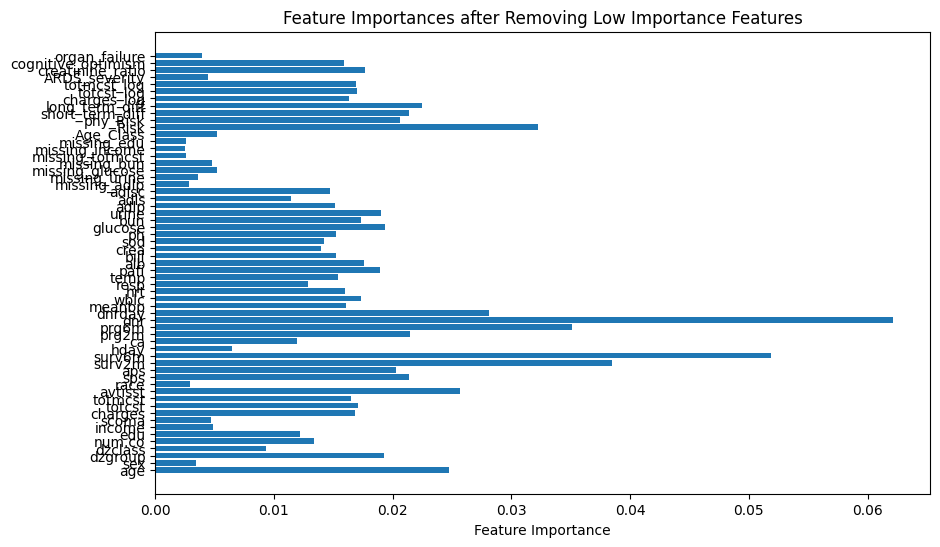

Number of features after removing low importance features: 59


In [ ]:
# delete columns with low feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
def delete_low_importance_features(data, target_cols, threshold=0.01):
    """
    Delete columns with low feature importance based on Random Forest Classifier.
    
    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing features and target.
    target_cols : list
        The names of the target columns.
    threshold : float
        The minimum feature importance value to retain a feature.
        
    Returns:
    --------
    pd.DataFrame
        The DataFrame with low importance features removed.
    """
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X = data.drop(columns=target_cols)
    y = data[target_cols[0]]  # Use the first target column for feature importance

    # Encode categorical columns
    X_encoded = X.copy()
    cat_cols = X_encoded.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        X_encoded[cat_cols] = oe.fit_transform(X_encoded[cat_cols])

    # Replace inf/-inf with np.nan, then fill np.nan with column median
    X_encoded = X_encoded.replace([np.inf, -np.inf], np.nan)
    X_encoded = X_encoded.fillna(X_encoded.median(numeric_only=True))

    # Fit Random Forest Classifier
    model = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=42)
    model.fit(X_encoded, y)

    # Get feature importances
    importances = model.feature_importances_

    # Select features above the threshold
    selected_features = X_encoded.columns[importances > threshold]
    
    return data[selected_features.tolist() + target_cols], model.feature_importances_
# Only drop columns that exist in the DataFrame
target_cols = [col for col in ['death', 'sfdm2', 'hospdead'] if col in data_no_outliers.columns]
data_no_low_importance, importance = delete_low_importance_features(data_no_outliers, target_cols=target_cols, threshold=0.0025)

# plot feature importances for selected features only
selected_features = data_no_low_importance.drop(columns=['death']).columns

# Only drop columns that exist in the DataFrame for original_features
original_features = data_no_outliers.drop(columns=target_cols).columns

# Get importances for selected_features by matching their positions in original_features
selected_importances = [importance[original_features.get_loc(col)] for col in selected_features if col in original_features]

# Ensure selected_features and selected_importances have the same length
selected_features_plot = [col for col in selected_features if col in original_features]

plt.figure(figsize=(10, 6))
plt.barh(selected_features_plot, selected_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances after Removing Low Importance Features')
plt.show()
print(f"Number of features after removing low importance features: {len(selected_features_plot)}")

In [ ]:
cat_cols = data_no_low_importance.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr', 'Age_Class',
       'ARDS_severity', 'sfdm2'],
      dtype='object')

In [ ]:
dataUnderstanding(data_no_low_importance)

--------------------------------------------------
Number of Rows:7693 | Number of Columns:62
--------------------------------------------------

List of Features in the dataset:
+--------------------+
| Column Names       |
|--------------------|
| age                |
| sex                |
| dzgroup            |
| dzclass            |
| num.co             |
| edu                |
| income             |
| scoma              |
| charges            |
| totcst             |
| totmcst            |
| avtisst            |
| race               |
| sps                |
| aps                |
| surv2m             |
| surv6m             |
| hday               |
| ca                 |
| prg2m              |
| prg6m              |
| dnr                |
| dnrday             |
| meanbp             |
| wblc               |
| hrt                |
| resp               |
| temp               |
| pafi               |
| alb                |
| bili               |
| crea               |
| sod           

In [ ]:
# Replace inf/-inf with np.nan before imputation
data_no_low_importance = data_no_low_importance.replace([np.inf, -np.inf], [1e6,1e-6])
data_no_low_importance = fill_missing_values_simplified(data_no_low_importance)
data_no_low_importance.isnull().sum()

age                   0
sex                   0
dzgroup               0
dzclass               0
num.co                0
                     ..
cognitive_optimism    0
organ_failure         0
death                 0
sfdm2                 0
hospdead              0
Length: 62, dtype: int64

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder, OneHotEncoder
NominalEncoder_list = ['dzgroup', 'dzclass','ca', 'dnr','sex','race','Age_Class']
map_information = {'nominal':{},'ordinal':{}}
# check the number of unique values in each categorical column
for col in cat_cols:
    print(f"Number of unique values in {col}: {data_no_low_importance[col].nunique()}")

Number of unique values in sex: 2
Number of unique values in dzgroup: 8
Number of unique values in dzclass: 4
Number of unique values in income: 4
Number of unique values in race: 5
Number of unique values in ca: 3
Number of unique values in dnr: 3
Number of unique values in Age_Class: 4
Number of unique values in ARDS_severity: 4
Number of unique values in sfdm2: 5


In [ ]:
# Ensure data_no_low_importance is defined
if 'data_no_low_importance' not in globals():
    # Only drop columns that exist in the DataFrame
    target_cols = [col for col in ['death', 'sfdm2', 'hospdead'] if col in data_no_outliers.columns]
    data_no_low_importance, importance = delete_low_importance_features(data_no_outliers, target_cols=target_cols, threshold=0.005)

# encode nominal encoder list as onehot encoder
for col in NominalEncoder_list:
    if col in data_no_low_importance.columns:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_col = ohe.fit_transform(data_no_low_importance[[col]])
        encoded_col_df = pd.DataFrame(encoded_col, columns=[f"{col}_{i}" for i in range(encoded_col.shape[1])], index=data_no_low_importance.index)
        data_no_low_importance = pd.concat([data_no_low_importance, encoded_col_df], axis=1)
        data_no_low_importance.drop(columns=[col], inplace=True)
        # record the mapping information
        map_information['nominal'][col] = ohe.categories_[0].tolist()
map_information

{'nominal': {'dzgroup': ['ARF/MOSF w/Sepsis',
   'CHF',
   'COPD',
   'Cirrhosis',
   'Colon Cancer',
   'Coma',
   'Lung Cancer',
   'MOSF w/Malig'],
  'dzclass': ['ARF/MOSF', 'COPD/CHF/Cirrhosis', 'Cancer', 'Coma'],
  'ca': ['metastatic', 'no', 'yes'],
  'dnr': ['dnr after sadm', 'dnr before sadm', 'no dnr'],
  'sex': ['female', 'male'],
  'race': ['asian', 'black', 'hispanic', 'other', 'white'],
  'Age_Class': ['Adult', 'Elderly', 'Senior', 'Young Adult']},
 'ordinal': {}}

In [ ]:
# encode ordinal encoder list and numeric columns
for col in cat_cols:
    # Skip columns that have been one-hot encoded and dropped, or are not present
    if col in NominalEncoder_list or col not in data_no_low_importance.columns:
        continue
    if data_no_low_importance[col].nunique() <= 30 and col!="scoma":  # Ordinal encoding for categorical columns (all with <= 30 unique values after manual check)
        oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        data_no_low_importance[col] = oe.fit_transform(data_no_low_importance[[col]])
        # record the mapping information as a dictionary: number value -> original value
        map_information['ordinal'][col] = {i: v for i, v in enumerate(oe.categories_[0])}
    else:
        data_no_low_importance[col] = data_no_low_importance[col].astype(float)  # Convert to float since mostly stated as float in the codebook
print(map_information)
# Only show columns that still exist
remaining_cat_cols = [col for col in cat_cols if col in data_no_low_importance.columns]
data_no_low_importance[remaining_cat_cols]

{'nominal': {'dzgroup': ['ARF/MOSF w/Sepsis', 'CHF', 'COPD', 'Cirrhosis', 'Colon Cancer', 'Coma', 'Lung Cancer', 'MOSF w/Malig'], 'dzclass': ['ARF/MOSF', 'COPD/CHF/Cirrhosis', 'Cancer', 'Coma'], 'ca': ['metastatic', 'no', 'yes'], 'dnr': ['dnr after sadm', 'dnr before sadm', 'no dnr'], 'sex': ['female', 'male'], 'race': ['asian', 'black', 'hispanic', 'other', 'white'], 'Age_Class': ['Adult', 'Elderly', 'Senior', 'Young Adult']}, 'ordinal': {'income': {0: '$11-$25k', 1: '$25-$50k', 2: '>$50k', 3: 'under $11k'}, 'ARDS_severity': {0: 'Mild', 1: 'Moderate', 2: 'Normal', 3: 'Severe'}, 'sfdm2': {0: '<2 mo. follow-up', 1: 'Coma or Intub', 2: 'SIP>=30', 3: 'adl>=4 (>=5 if sur)', 4: 'no(M2 and SIP pres)'}}}


,income,ARDS_severity,sfdm2
0,0.0,3.0,0.0
1,3.0,0.0,0.0
2,3.0,0.0,4.0
3,3.0,1.0,4.0
4,3.0,0.0,0.0
...,...,...,...
7688,0.0,1.0,4.0
7689,3.0,0.0,0.0
7690,3.0,1.0,4.0
7691,3.0,2.0,0.0


# Data Visualization

In [ ]:
df=data_no_low_importance
# use LDA to pick out important features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Identify the correct target column for LDA
target_col = df['sfdm2']

# Prepare X and y for LDA
df = df.drop(columns=['sfdm2'])
X_lda_input = df.select_dtypes('number').copy()
y_lda = target_col

# LDA: n_components must be <= min(n_features, n_classes - 1)
n_classes = len(np.unique(y_lda))
n_features = X_lda_input.shape[1]
max_components = min(n_features, n_classes - 1)
lda = LDA(solver='svd',n_components=max_components)
X_lda = lda.fit_transform(X_lda_input, y_lda)
# Convert X_lda to DataFrame before concatenation
X_lda_df = pd.DataFrame(X_lda)
lda_df = pd.concat([X_lda_df], axis=1)
lda_df

,0,1,2,3
0,-1.458989,0.868495,0.296025,0.318052
1,0.948684,0.550913,-0.711210,1.167954
2,0.929739,1.022713,0.691054,0.201167
3,1.559313,-0.403968,0.566163,-0.910798
4,-2.219692,0.447518,1.076055,-1.316043
...,...,...,...,...
7688,2.131874,0.837839,0.144973,-1.002792
7689,-0.315637,-0.822237,-0.707900,0.072820
7690,1.712415,0.895654,0.006395,-0.287984
7691,-2.967906,1.324092,0.277616,0.277501


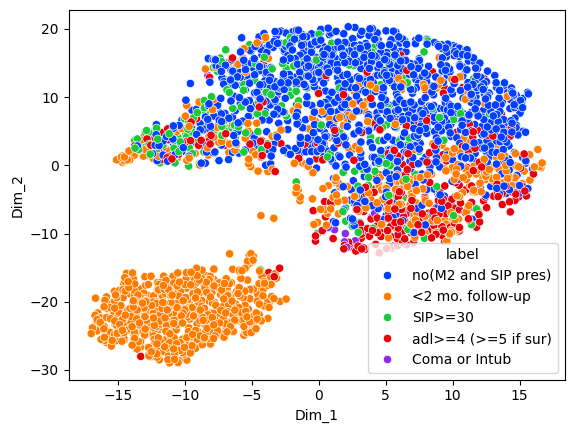

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# 2D t-SNE plot
indexes = df[5000:].index
data_1000 = lda_df.iloc[indexes]
labels_1000 = target_col.iloc[indexes]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_1000)
tsne = TSNE(n_components=2, perplexity=170, random_state=3407, max_iter=10000)
tsne_result = tsne.fit_transform(scaled_data)
tsne_df = pd.DataFrame(data=tsne_result, columns=["Dim_1", "Dim_2"])
# Convert float labels to int for mapping
label_map = map_information['ordinal']['sfdm2']
tsne_df["label"] = [label_map.get(int(l), str(l)) for l in labels_1000.values]

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()

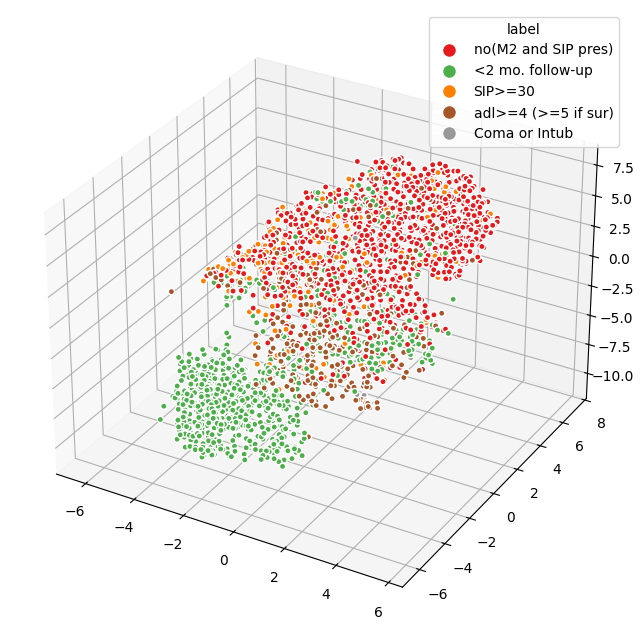

In [ ]:
# 3D t-SNE plot
tsne_3D = TSNE(n_components=3, perplexity=170, random_state=3407, max_iter=10000)
tsne_result_3D = tsne_3D.fit_transform(scaled_data)
tsne_df_3D = pd.DataFrame(data=tsne_result_3D, columns=["Dim_1", "Dim_2", "Dim_3"])
# Convert float labels to int for mapping
tsne_df_3D["label"] = [label_map.get(int(l), str(l)) for l in labels_1000.values]

# Map string labels to integers for coloring
unique_labels = tsne_df_3D["label"].unique()
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
tsne_df_3D["label_int"] = tsne_df_3D["label"].map(label_to_int)

from matplotlib.colors import ListedColormap, BoundaryNorm

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a ListedColormap for consistent color mapping
cmap = plt.get_cmap("Set1", len(unique_labels))
norm = BoundaryNorm(range(len(unique_labels) + 1), cmap.N)

scatter = ax.scatter(
	tsne_df_3D["Dim_1"], tsne_df_3D["Dim_2"], tsne_df_3D["Dim_3"],
	c=tsne_df_3D["label_int"], cmap=cmap, norm=norm, alpha=1, edgecolors='white'
)

# Create legend with matching colors
handles = [
	plt.Line2D([0], [0], marker='o', color='w', label=label,
			   markerfacecolor=cmap(idx), markersize=10)
	for label, idx in label_to_int.items()
]
ax.legend(handles=handles, title="label")
plt.show()

In [ ]:
# Clustering Analysis
df = data_no_low_importance
df.to_csv("preprocessed_data.csv",index=False)

# Prediction: Training and Testing

# Evaluation and Choice of Prediction Model

# Open-Ended Exploration